# Implementation

- We will apply PCA to the wine dataset, both to demonstrate how it can be used to analyze high-dimentional systems, and visualize systems with high dimentional attributes as a 2d graph.

# 1 - Import libraries and load data

- we will load the dataset, which is stored in the sklearn library

In [9]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load and standardize
data = load_wine()

## Standarize the data for consistency

In [10]:
X = StandardScaler().fit_transform(data.data)
y = data.target

# 2 - Apply PCA 

- we apply PCA to this system, which originally has 13 attributes, reducing its dimention from 13 to 2. 

In [11]:
# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 3 - Plot the dimentionally reduced wine dataset

- we will plot the wine dataset after it has been reduced 

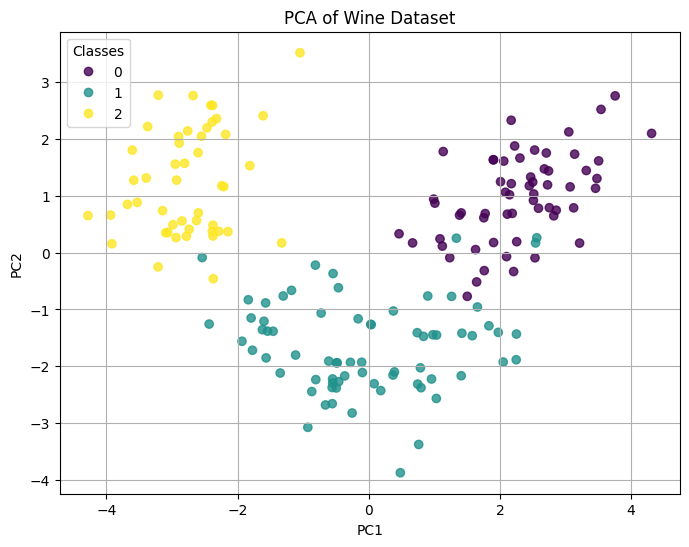

In [8]:
# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis', alpha=0.8)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Wine Dataset')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()



** Remarks **

- We can see that after performing PCA, the dataset with 13 attributes is reduced to a system with only two. and from the graphs we can see three distinct clusters, albeit with certain outliers. 

- Strong implication that this would work really well with K Mean Clustering

# 4 - Plot the variance explained vs. # of PCA components

- we will plot the percentage of variance in the data explained as we increase the number of PCA components used, up to 5. 

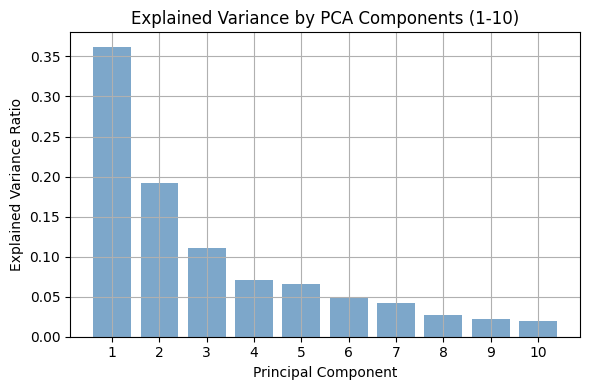

In [20]:
# Standardize the features
X_scaled = StandardScaler().fit_transform(X)

# Apply PCA for the number of components equal to the number of features in the dataset (or a max of 5 components)
n_components = min(10, X_scaled.shape[1])  # Use up to 5 components, or fewer if there are fewer features
pca = PCA(n_components=n_components)
pca.fit(X_scaled)

# Plot explained variance ratio for components 1 to n_components
plt.figure(figsize=(6, 4))
plt.bar(range(1, n_components + 1), pca.explained_variance_ratio_, alpha=0.7, color='steelblue')
plt.xticks(range(1, n_components + 1))
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title(f"Explained Variance by PCA Components (1-{n_components})")
plt.grid(True)
plt.tight_layout()
plt.show()


## Cummulative Variance explained

- We add up the previous graph and plot against Cummulative explained variance instead

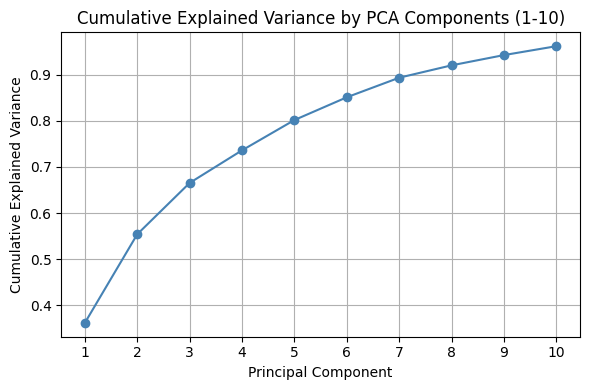

In [21]:
# Plot cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()

plt.figure(figsize=(6, 4))
plt.plot(range(1, n_components + 1), cumulative_variance, marker='o', color='steelblue')
plt.xticks(range(1, n_components + 1))
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Explained Variance")
plt.title(f"Cumulative Explained Variance by PCA Components (1-{n_components})")
plt.grid(True)
plt.tight_layout()
plt.show()

** Remark **

- as the number of principal component go up, we see the additional explained variance by each step getting smaller. Cummulatively speaking, it approaches 1 as we had up to 10 Principal Components

- with 5 components we were able to account for 80% of the variance in the data, demonstrating the power of PCA reduction, reducing the problem from 13D to 5D while not proportionally lossing power.

# 5 - Plotting accuracy of different models vs. # of PCA's used

- here we will plot the accuracy of different models as more PCA's are used. we hope to find the optimal number of components to use that balances accuracy and performance. 

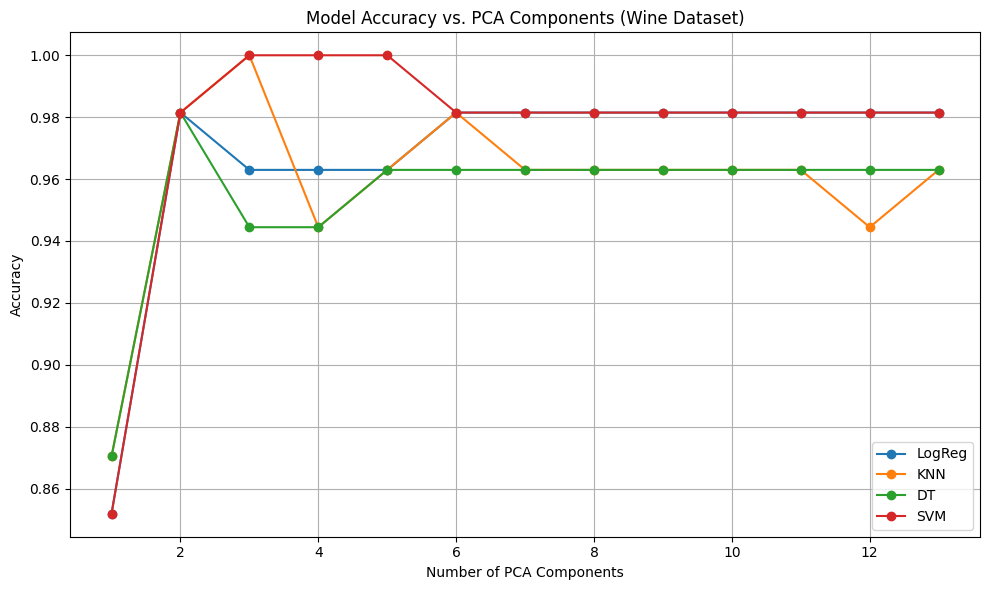

In [22]:
data = load_wine()
X_raw = data.data
X_scaled = StandardScaler().fit_transform(X_raw)


# Models
models = [
    ("LogReg", LogisticRegression(max_iter=1000)),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("DT", DecisionTreeClassifier(max_depth=4)),
    ("SVM", SVC())
]

# Store accuracy results
results = {name: [] for name, _ in models}

# Evaluate across PCA dimensions
for n in range(1, X_scaled.shape[1] + 1):
    X_pca = PCA(n_components=n).fit_transform(X_scaled)
    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

    for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results[name].append(acc)

# Plot accuracy vs. PCA dimensions
plt.figure(figsize=(10, 6))
for name, accs in results.items():
    plt.plot(range(1, X_scaled.shape[1] + 1), accs, label=name, marker='o')
plt.title("Model Accuracy vs. PCA Components (Wine Dataset)")
plt.xlabel("Number of PCA Components")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


** Remarks **

- Importantly, we also wanted to see the impact of different numbers of PCA components on differnet models. This information can be used to determine the optimal number of components to use depending on the model we use. 

- we note that the trend is generally the same for every model, achieving the most stable, and highest accuracy at 2 components, but we see models like SVM's peaking at 4, while DT and KNN tanked at the same number.

# Conclusion

- PCA is a really powerful method to use, especially when the data we're dealing with have multiple attributes that we want to regress over. It is able to reduce the dimentionality while preserving most of the variances in the data, allowing for faster computation and making visualizing higher dimentional datasets possible. 

- We also note that the accuracy with the number of PCA component differs depeneding on the specific model used, so it will be important for us to consider its affect on the specific model when considering whether or not to use PCA for a given model. 